<a href="https://colab.research.google.com/github/eliasfeitoza/Curso-Data-Science-na-Pratica/blob/master/Projeto_Detec%C3%A7%C3%A3o_de_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9ditos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://bit.ly/2AKEFXY" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas <b>européias</b> de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de <b>dois dias</b>, onde foram classificadas <b>492 fraudes em meio a quase 290 mil transações.</b>

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas <b>0,17%</b> do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [ ]:
# Importar os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# Iportando os pacotes utilizados nos modelos de Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# Configurando os etilos dos gráficos com o Seaborn

sns.set_style("dark")


# Importação do Arquivo CSV

In [ ]:
# Importando os dados do CSV para um DataFrame e assim iniciarmos a primeira visualização dos dados

file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

fraude = pd.read_csv(file_path) # Tranferindo os dados para a variável "fraude" que será o nosso dataset


* Após as tranefrência dos dados iniciaremos agora a nossa <b>Analise Exploratória</b> para que possamos prosseguir para a criação dos modelos de <b>Machine Learning</b>

# Análise Exploratória

Apenas olhando as cinco primeiras entradas é possível tirar algumas conclusões:

* As 5 primeiras entradas permitem entender como a transformação PCA deixou as *features* descaracterizadas (anônimas) e em valores numéricos. Para saber mais sobre PCA, [clique neste *link*](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf).

* As colunas `Time` e `Amount` foram preservadas, mantendo seu valor original.

* A variável alvo está representada na coluna `Class`, onde:
    * **0:** Transação normal; e
    * **1:** Transação fraudulenta;

In [ ]:
# Visualizando as primeiras entradas através do comando "head()"

fraude.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* Verificando abaixo o resumo estatístico, através do método `describe()`, podemos confirmar que as variáveis relativas aos componentes principais <b>( Transformação PCA)</b> não tem nenhuma discrepância aparente, bem como a coluna `Time`.

* Em relação a variável `Amount`, nota-se que o valor médio de transações ( Considerando ambas as classes ) é <b>88.34</b>, mediana igual a <b>22.00</b> e desvio padrão de <b>25691.16</b>, a maioria das transações financeiras é composta em sua maioria por quantias menores - como esperado.

In [ ]:
# Visualizando o Resumo Estatístico atraves do método "describe"

fraude.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* Quanto à qualidade do *dataset*, este não apresentou nenhum valor ausente ou que demandasse uma etapa de limpeza. Na função abaixo, perceba que todos os valores estão como zero, o que confirma que não há valores ausentes ou `null`.

In [ ]:
# Visualizando se há valores ausente nas variáveis que serão estudadas através do método "isnull()"

fraude.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* Como é [informado na descrição dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), as entradas relativas à transações fraudulentas correspondem a 0,17% do total.

*O gráfico de barras mostra como essa discrepância se torna nítida e visível. Na prática, isso interfere no desempenho do modelo, e será necessário fazer um <b>Balanceamento dos dados</b> antes de alimentar o modelo final de classificação.

0    284315
1       492
Name: Class, dtype: int64

 As Fruades Representam  0.17% do DataSet. 



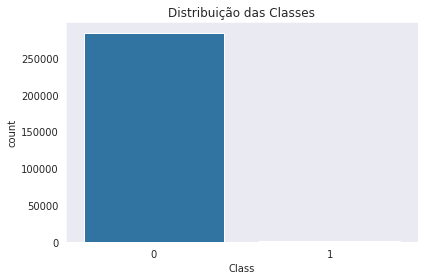

In [ ]:
# Verificando o Balanceamento dos valores da Variável alvo "Class"

print(fraude.Class.value_counts())
print("\n As Fruades Representam  {:.2f}% do DataSet. \n".format((fraude[fraude.Class == 1].shape[0] / fraude.shape[0]) * 100))

# Plotando os Gráfico de Barras desta análise

fig, ax = plt.subplots()
sns.countplot("Class", data= fraude, ax=ax)
ax.set_title("Distribuição das Classes")
plt.tight_layout();

* Plotando um gráfico de histograma em relação a dimensão `Time`, para compararmos as transações com Fraude e as Normais, comparando assim o tempo gasto nas operações.

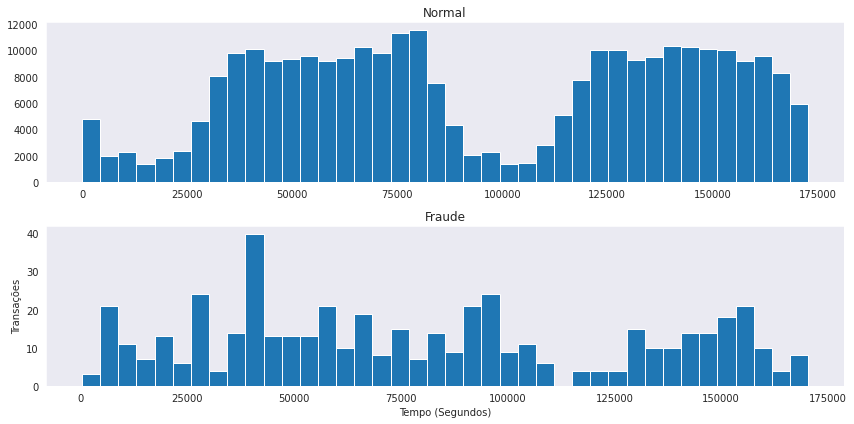

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(12,6)) # Definindo a figura do gráfico, numero de linhas e colunas que utilizaremos e seus tamanhos

num_bins = 40 # Definindo o toal de barras (Bins) do histograma

ax[0].hist(fraude.Time[fraude.Class == 0], bins=num_bins)
ax[0].set_title("Normal")


ax[1].hist(fraude.Time[fraude.Class == 1], bins=num_bins)
ax[1].set_title("Fraude")

plt.xlabel("Tempo (Segundos)")
plt.ylabel("Transações")
plt.tight_layout();

* Seguindo a análise exploratória, plotou-se os *boxplots* para ver se há alguma diferença no padrão das transações em relação à dimensão `Amount`.

* De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de *machine learning*.

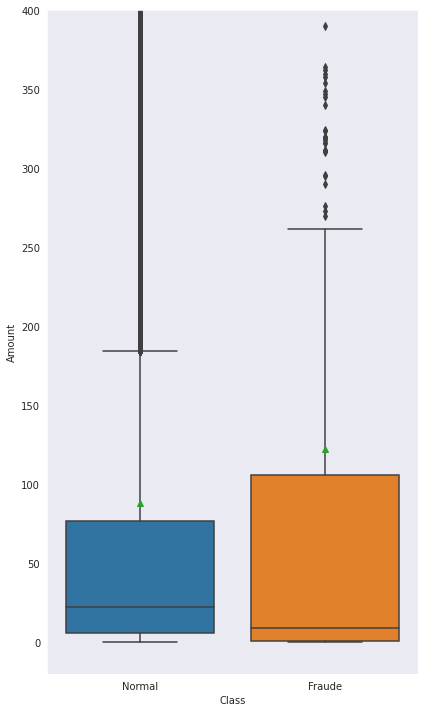

In [ ]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(fraude.Class, fraude.Amount, showmeans=True, ax=ax)

plt.ylim((-20, 400)) # Controlando a altura do BoxPlot em relação a base inferior e a base superior, podendo observar os outliers
plt.xticks([0,1],["Normal","Fraude"])

plt.tight_layout();

As informações estatísticas para `df.Class == 1`, Fraudes, mostram que a sua média exata está em 118.13 e a mediana em 9.21.

In [ ]:
fraude[(fraude.Class == 1) & (fraude.Amount < 2000)]["Amount"].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

* O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

* O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis `V3`, `V4`, `V10` e `V11`, como elas são bem distintas.

* Por outro lado, variáveis como `V8`, `V13` e `V15` são muito similares, apresentando aproximadamente o mesmo comportamento.

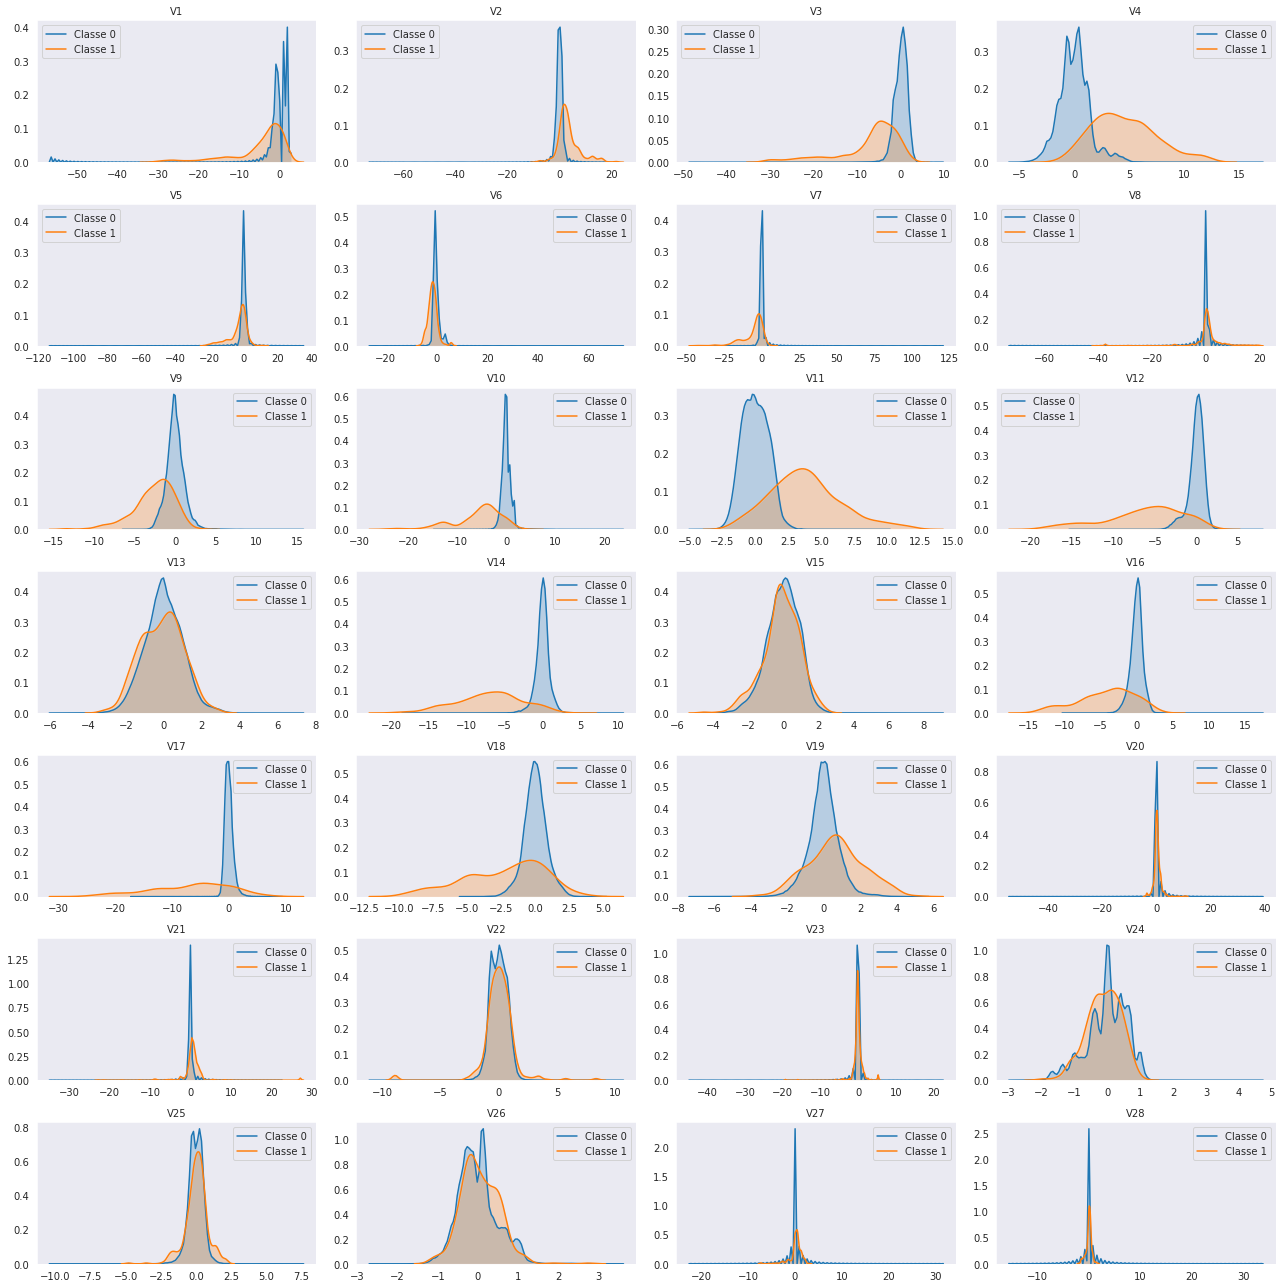

In [ ]:
Colunas = fraude.drop(["Class","Amount","Time"], axis= 1).columns
num_plots = len(Colunas)
Fraude_Classe_0 = fraude [fraude.Class == 0]
Fraude_Classe_1 = fraude [fraude.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols = 4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0

for col in Colunas:
  idx = idx + 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(Fraude_Classe_0[col], label= "Classe 0", shade= True)
  sns.kdeplot(Fraude_Classe_1[col], label= "Classe 1", shade= True)
  plt.title(col, fontsize=10)

plt.tight_layout();  

* Algumas observações principais que puderam ser extraídas dessa etapa exploratória foram:

* O *dataset* está muito desbalanceado, uma vez que as transações fraudulentas representam apenas 0,17% das entradas totais.
* Não existem valores ausentes ou nulos no *dataframe*.
* Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa que as *features* originais foram padronizadas.
* As colunas `Time` e `Amount` não estão normalizadas.

## Preparando os dados

Para que os dados possam alimentar o modelo de Regressão Logística que iremos construir, nesta etapa de preparação iremos:

* Padronizar as *features* `Time` e `Amount`, que estão em outra ordem de grandeza.
* Dividir entre dados de treino e teste
* Balancear os dados a fim de evitar uma baixa performance para a classe 1 e *overfitting*.

**Padronizar `Time` e `Amount`**

Para esta etapa, uma vez que a coluna `Amount` possui *outliers* será usada a padronização por meio da classe `StandardScaler`.

In [ ]:
# Padronizando as colunas Time e Amount

fraude_Clean = fraude.copy() # Criando uma cópia do dataset para limpeza de dados não danificar o original, aribuindo-o para a variável fraude_Clean

Padronizacao = StandardScaler() # Processo de padronização dos dados das colunas Amount e Time pelo método StandarScaler deixando no mesmo format de dados
fraude_Clean["Padronizacao_Amount"] = Padronizacao.fit_transform(fraude_Clean["Amount"].values.reshape(-1,1))
fraude_Clean["Padronizacao_Time"] = Padronizacao.fit_transform(fraude_Clean["Time"].values.reshape(-1,1))

fraude_Clean.drop(["Time","Amount"], axis = 1, inplace=True)

# Visualizando as primeiras entradas

fraude_Clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Padronizacao_Amount,Padronizacao_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Dividir entre conjuntos de treino e teste**

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre treino e teste. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

Para garantir que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente, passamos `stratify=True`.

In [ ]:
# Separar as Variáveis entre X e Y

x = fraude_Clean.drop("Class", axis = 1)
y = fraude["Class"]

# Dividir o dataset entre Treino e Teste

xtreino, xteste, ytreino, yteste = train_test_split(x , y, stratify= y, shuffle=True)


**Balanceamento dos dados**

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar *Under-sampling*, preservando a classe minoritária.

É fácil ver que não há mais aquela discrepância inicial (gráfico de barras no início deste *notebook*).

1    369
0    369
dtype: int64


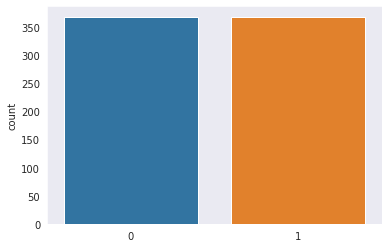

In [ ]:
# Utilizando a técnica Under-Sampling

rus = RandomUnderSampler()
xrus, yrus = rus.fit_sample( xtreino, ytreino )

# Visualizando o balanceamento das Classes

print(pd.Series(yrus).value_counts())

# Plotando a nova distribuição das Classes

sns.countplot(yrus);

* Com os dados balanceados, podemos ver a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras.

* Observe como anteriormente, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

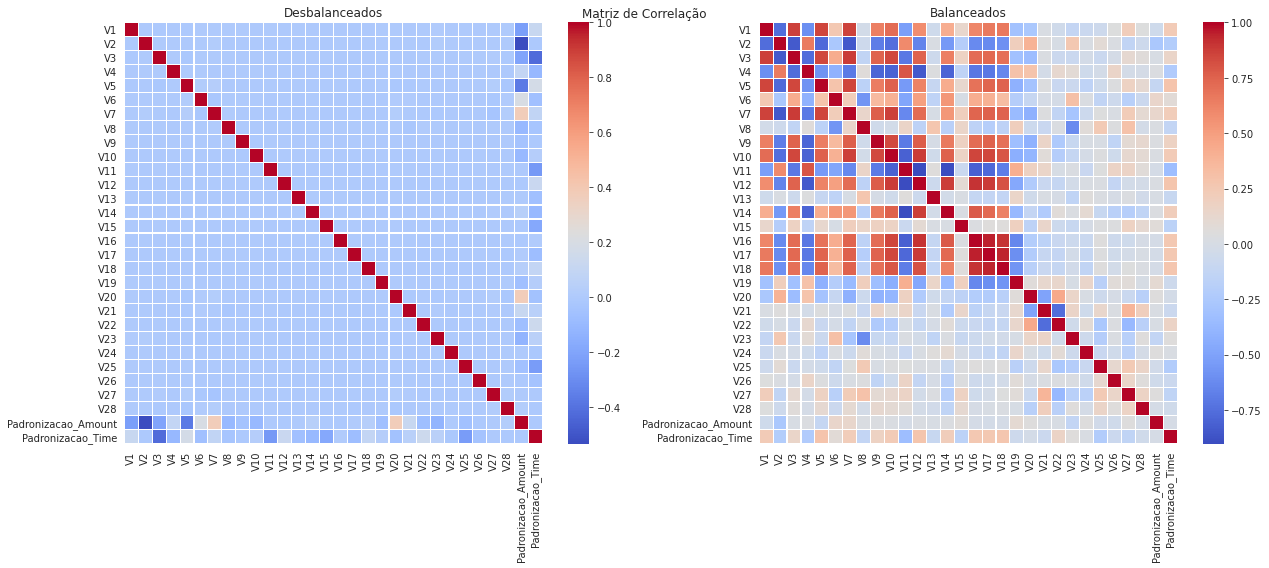

In [ ]:
# Plotando a Matriz de Correlação de ambos os cenários, antes do balanceamento e depois

corr = xtreino.corr()
corr_rus = pd.DataFrame(xrus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

#Elaboração do Gráfico dos dados desbalanceados
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title("Desbalanceados")

#Elaboração do Gráfico com os dados Balanceados
sns.heatmap(corr_rus, xticklabels= corr.columns, yticklabels= corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title("Balanceados")

plt.tight_layout();


## Modelo de Machine Learning

* Com todos os dados preparados e após uma análise exploratória completa, irei construir um classificador usando a Regressão Logística.

* Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(xrus, yrus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(xteste)
y_proba = model.predict_proba(xteste)

* Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.

* Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada. você pode ter uma acurácia de 99,88% e detectar menos de 60% das fraudes.

Observe a matriz de confusão para ver a taxa de acertos para transações fraudulentes, ou pela coluna *recall* do Relatório de Classificação. 

Uma outra métrica considerada interessante para se avaliar a eficácia é a [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), ou área sob a curva. No caso desse modelo de Regressão Logística, tem-se 93,48% de AUC.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9753    0.9874     71079
           1     0.0590    0.8943    0.1107       123

    accuracy                         0.9752     71202
   macro avg     0.5294    0.9348    0.5491     71202
weighted avg     0.9982    0.9752    0.9859     71202

Acurácia: 0.9752

AUC: 0.9348



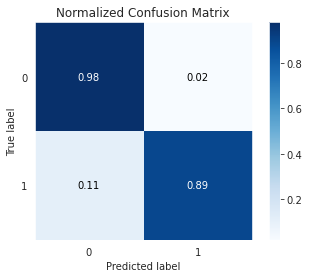

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(yteste, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(yteste, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(yteste, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(yteste, y_pred)))